<a href="https://colab.research.google.com/github/jcmachicao/gestion_proyectos/blob/main/pm__modelamiento_alcance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelamiento de Alcance

Diseñado por: José Carlos Machicao<br>
Actualizado: Sep 2023<br>
GestioDinámica<br>

In [150]:
#@title Importaciones
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [151]:
num_simulaciones = 500

<Axes: >

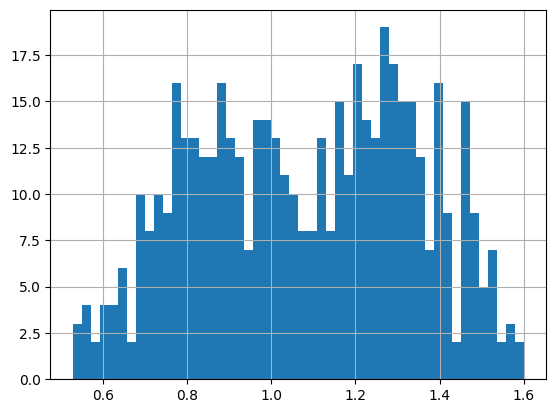

In [152]:
#@title Histograma
def calcular_alcance(factores):
    alcance = factores[0]*0.2 + factores[1]*0.1 + factores[2]*0.1 + factores[0]*factores[2]*0.01 + random.uniform(0.1, 0.3)
    return alcance
data = []
for i in range(num_simulaciones):
  factores_externos = [random.uniform(0.1, 4.0), random.uniform(0.5, 2.0), random.uniform(2.5, 3.0)]
  alcance_x = calcular_alcance(factores_externos)
  factores_externos.append(alcance_x)
  data.append(factores_externos)

data_df = pd.DataFrame(data)
data_df.columns = ['F1', 'F2', 'F3', 'Alcance']
data_df.Alcance.hist(bins=50)

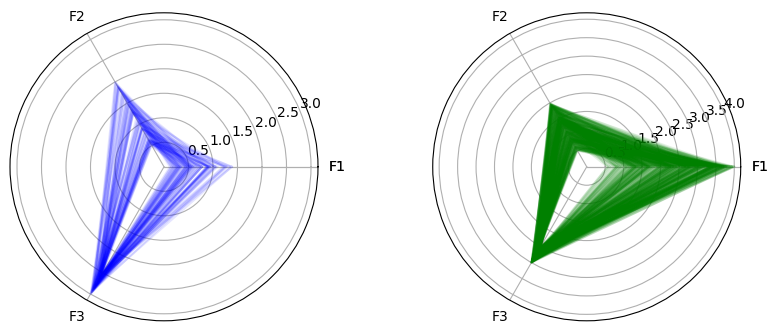

In [154]:
#@title Gráfica
amax=data_df.Alcance.max()
df1 = data_df[data_df.Alcance<amax/2]
df2 = data_df[data_df.Alcance>amax/2]
df1, df2 = df1.drop('Alcance', axis=1), df2.drop('Alcance', axis=1)
#fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'polar': True})
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), subplot_kw={'polar': True})

# Set angles for each axis
angles = np.linspace(0, 2 * np.pi, 3, endpoint=False).tolist()
angles += angles[:1]

for i, (_, row) in enumerate(df1.iterrows()):
  values = row.values.flatten().tolist()
  values.append(values[0])
  ax1.plot(angles, values, alpha=0.1, color='blue')
ax1.set_xticks(angles)
ax1.set_xticklabels(['F1', 'F2', 'F3', 'F1'])

for i, (_, row) in enumerate(df2.iterrows()):
  values = row.values.flatten().tolist()
  values.append(values[0])
  ax2.plot(angles, values, alpha=0.1, color='green')
ax2.set_xticks(angles)
ax2.set_xticklabels(['F1', 'F2', 'F3', 'F1'])

plt.show()